# Titanic challenge from <a href='https://www.kaggle.com/c/titanic/data'>Kaggle</a>

## Load Data

In [1]:
import os
dataset_dir = 'datasets/titanic/'

train_path = os.path.join(dataset_dir, 'train.csv')
test_path = os.path.join(dataset_dir, 'test.csv')
submission_path = os.path.join(dataset_dir, 'gender_submission.csv')

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
print(train_data.info())
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# function for saving preds
def save_preds(predictions):
    data_to_save = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    data_to_save.to_csv(submission_path, index=False)
    print('Saving preds success!')

In [5]:
# Considering only numerical features
from sklearn.base import BaseEstimator

features=['Pclass', 'SibSp', 'Parch', 'Fare']
print(train_data.describe())
X = train_data[features]
y = train_data['Survived']

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## First Pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

numeric_only_pipeline = Pipeline([('select_features', StandardScaler()),
                                 ('forest_classifier', RandomForestClassifier())])

In [7]:
numeric_only_pipeline.fit(X, y)

Pipeline(steps=[('select_features', StandardScaler()),
                ('forest_classifier', RandomForestClassifier())])

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(numeric_only_pipeline, X, y, cv=3)

array([0.67003367, 0.68013468, 0.73400673])

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

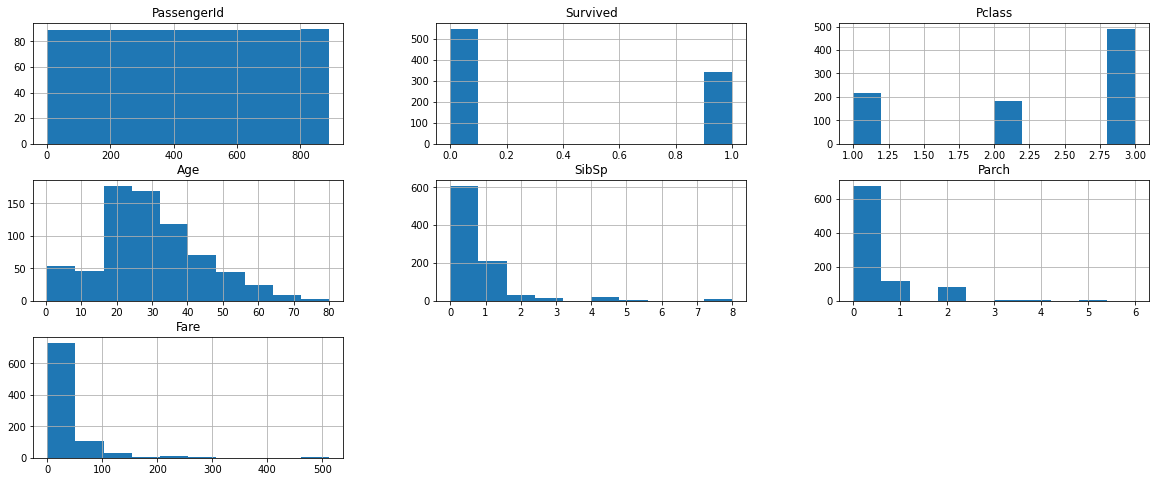

In [9]:
train_data.hist(figsize=(20,8))

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import TransformerMixin

# pipeline with categorical data

num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex', 'Ticket', 'Cabin', 'Embarked']


data_num = train_data[num_features].copy()
# data_num["Age"].fillna(data_num['Age'].median(), inplace=True)
print(data_num.info())
data_cat = train_data[cat_features].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB
None


In [44]:
from sklearn.compose import ColumnTransformer

cat_feature_indices = [5, 6, 7, 8]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    [('numericals', SimpleImputer(strategy='mean'), num_features),
     ('categoricals', cat_pipeline, cat_features)],
    remainder='drop'
)


In [46]:
newline = Pipeline([
    ('col_transformer', preprocessor),
    ('classify', RandomForestClassifier(random_state=0))
])
y = train_data['Survived']
preprocessor.fit(train_data)
dat = preprocessor.transform(train_data)

In [47]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(dat, y)
cross_val_score(rfc, dat, y, cv=5)

array([0.82122905, 0.80898876, 0.86516854, 0.81460674, 0.86516854])

In [48]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=0)
sgd.fit(dat, y)
cross_val_score(sgd, dat, y, cv=5)

array([0.62569832, 0.73033708, 0.66853933, 0.38764045, 0.69662921])

In [49]:
from sklearn.metrics import precision_score, recall_score

y_preds_forest = rfc.predict(dat)
y_true = y

precision_score(y_true, y_preds_forest)

0.9970845481049563

In [50]:
recall_score(y_true, y_preds_forest)

1.0

In [54]:
#saving for submission
test_tr = preprocessor.fit_transform(test_data)
test_preds = rfc.predict(test_tr)
save_preds(test_preds)

Saving preds success!
